In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [0]:
order_products_prior_data=pd.read_csv('/content/drive/My Drive/Project_8/Dataset/order_products__prior.csv')

In [0]:
order_products_prior_data.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [0]:
aisles_data=pd.read_csv('/content/drive/My Drive/Project_8/Dataset/aisles.csv')

In [0]:
aisles_data.head(20)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [0]:
departments_data=pd.read_csv('/content/drive/My Drive/Project_8/Dataset/departments.csv')

In [0]:
departments_data

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [0]:
order_products_train_data=pd.read_csv('/content/drive/My Drive/Project_8/Dataset/order_products__train.csv')

In [0]:
order_products_train_data.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [0]:
orders_data=pd.read_csv('/content/drive/My Drive/Project_8/Dataset/orders.csv')

In [0]:
orders_data.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [0]:
products_data=pd.read_csv('/content/drive/My Drive/Project_8/Dataset/products.csv')

In [0]:
products_data.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


**Analysis from order table**

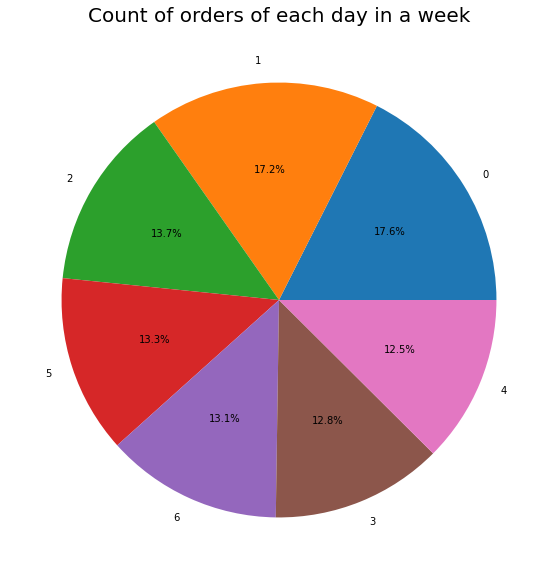

In [0]:
plt.figure(figsize=(10,10))
data = orders_data['order_dow'].value_counts()
day = data.index
sizes = data.values
plt.pie(sizes, labels=day, autopct='%1.1f%%')
plt.title('Count of orders of each day in a week',fontsize=20) 
plt.show()


Text(0.5, 0, 'Hour of day')

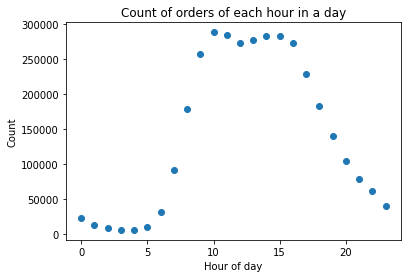

In [0]:
data = orders_data['order_hour_of_day'].value_counts()
points = data.index 
frequency = data.values 
plt.scatter(points, frequency) 
plt.title('Count of orders of each hour in a day') 
plt.ylabel('Count') 
plt.xlabel('Hour of day')

Text(0, 0.5, 'Days since last order')

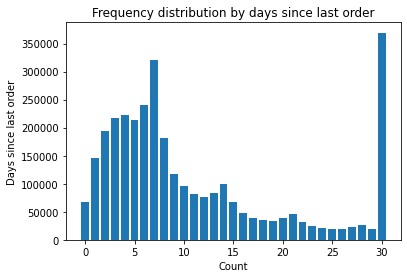

In [0]:
data = orders_data['days_since_prior_order'].value_counts()
points = data.index 
frequency = data.values 
plt.bar(points, frequency) 
plt.title('Frequency distribution by days since last order') 
plt.xlabel('Count') 
plt.ylabel('Days since last order')

In [0]:
order_products_prior_df = pd.merge(order_products_prior_data, products_data, on='product_id', how='left')


In [0]:
order_products_prior_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13
...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1
32434487,3421083,24852,9,1,Banana,24,4


**Analysis from aisle table**

In [0]:
order_products_prior_df = pd.merge(order_products_prior_df, aisles_data, on='aisle_id', how='left')

In [0]:
data = order_products_prior_df['aisle'].value_counts().head(20)
data

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64

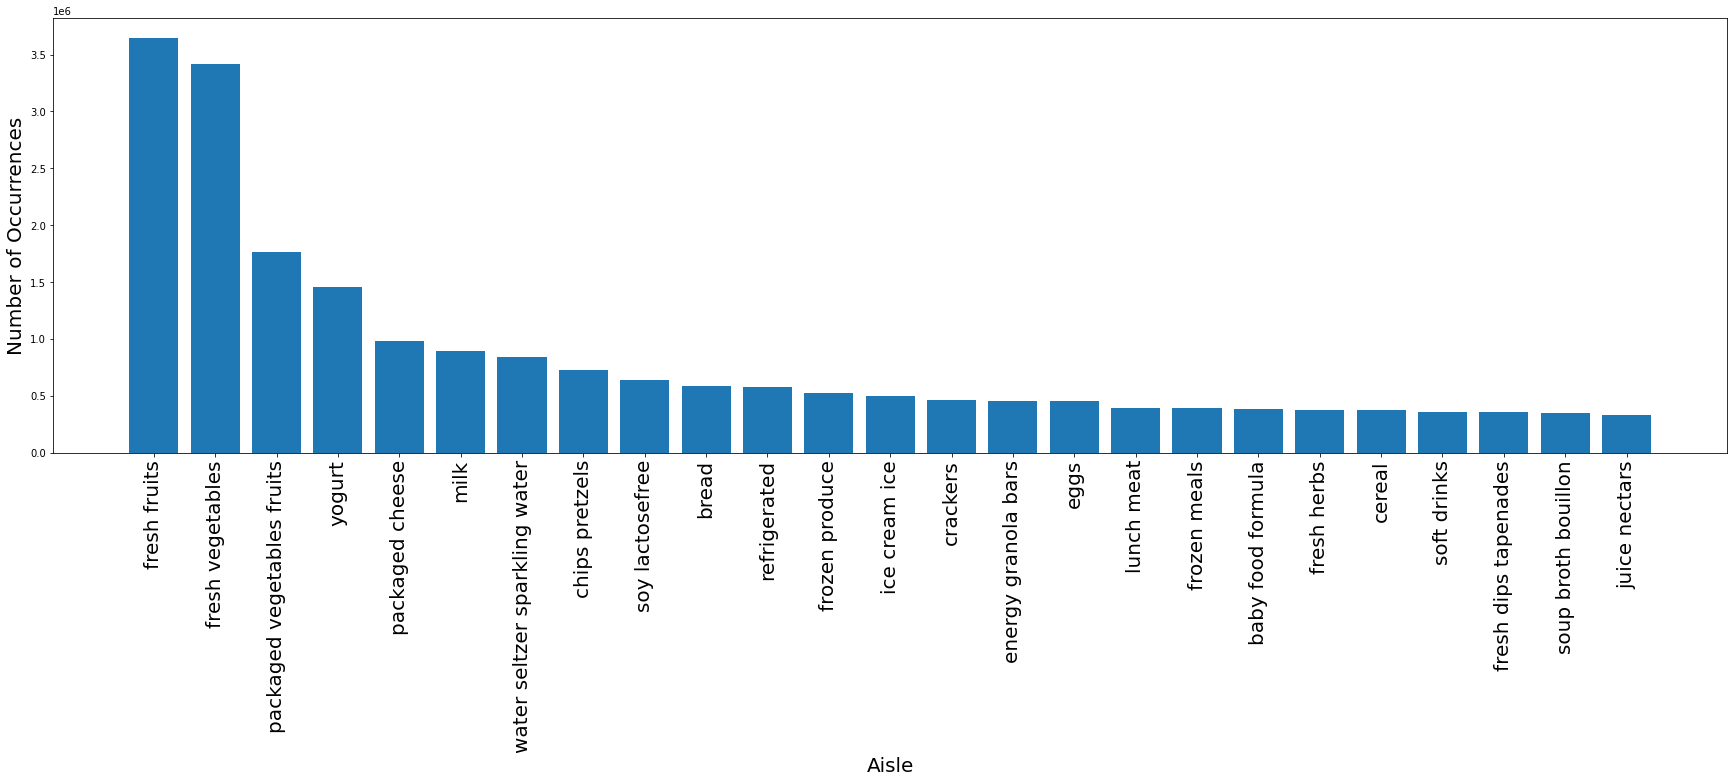

In [0]:
data = order_products_prior_df['aisle'].value_counts().head(25)
plt.figure(figsize=(30,8))
points = data.index 
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Aisle', fontsize=20)
plt.xticks(rotation='vertical',fontsize=20)
plt.show()


**Analysis from Department table**

In [0]:
order_products_prior_df = pd.merge(order_products_prior_df, departments_data, on='department_id', how='left')


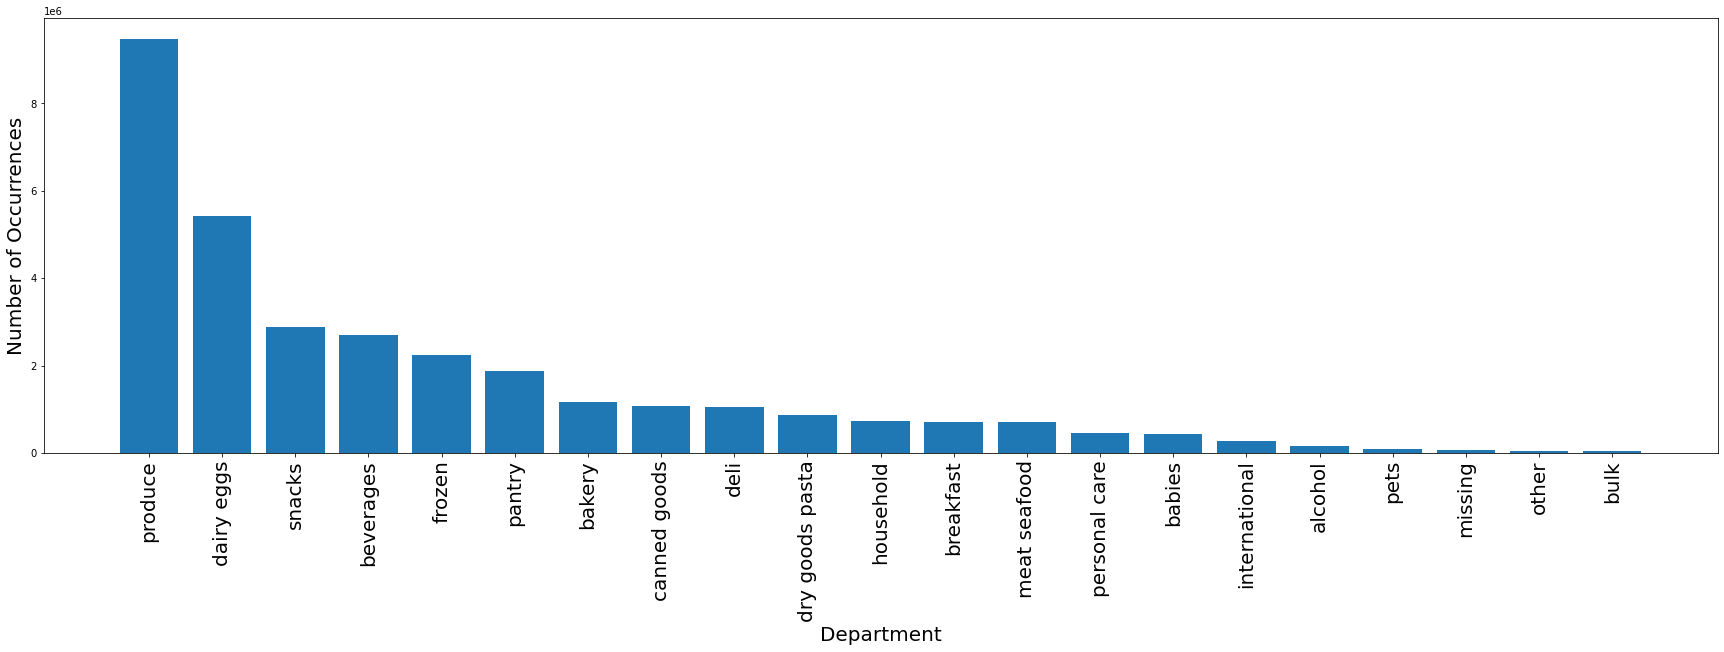

In [0]:
data = order_products_prior_df['department'].value_counts()
plt.figure(figsize=(30,8))
points = data.index 
frequency = data.values 
plt.bar(points, frequency) 
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Department', fontsize=20)
plt.xticks(rotation='vertical',fontsize=20)
plt.show()


**Analysis from Product table**

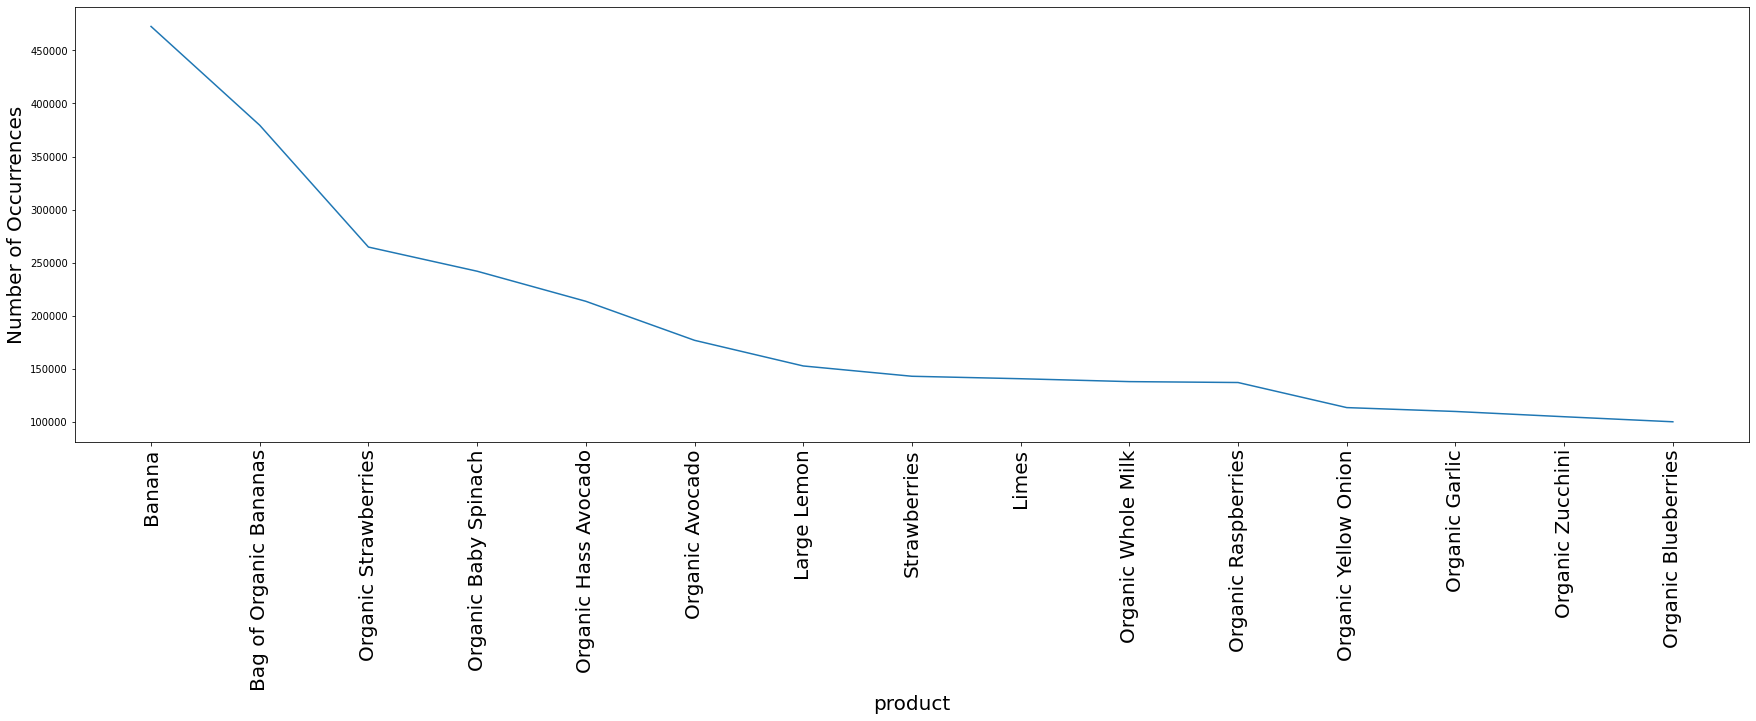

In [0]:
data = order_products_prior_df['product_name'].value_counts().head(15)
plt.figure(figsize=(30,8))
points = data.index 
frequency = data.values 
plt.plot(points, frequency) 
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('product', fontsize=20)
plt.xticks(rotation='vertical',fontsize=20)
plt.show()


In [0]:
data = order_products_prior_df['reordered'].value_counts(normalize=True)
data

1    0.589697
0    0.410303
Name: reordered, dtype: float64

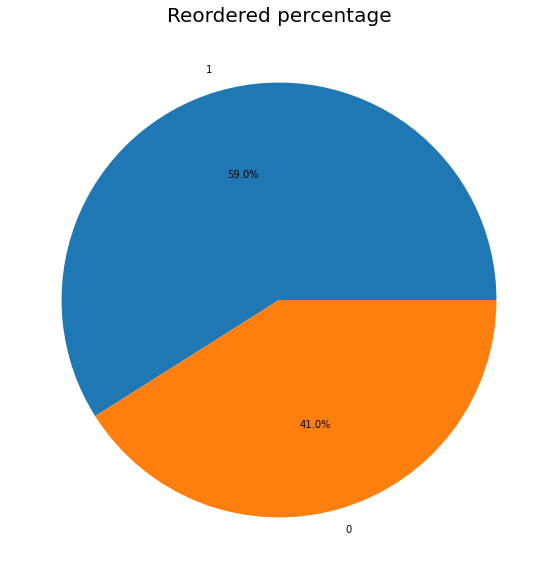

In [0]:
plt.figure(figsize=(10,10))
data = order_products_prior_df['reordered'].value_counts()
reorder = data.index
sizes = data.values
plt.pie(sizes, labels=reorder, autopct='%1.1f%%')
plt.title('Reordered percentage',fontsize=20) 
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0, flags=flags)


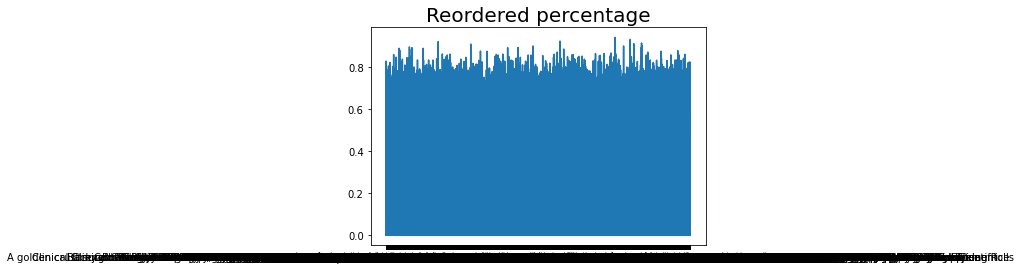

In [0]:
data = order_products_prior_df.groupby('product_name')['reordered'].aggregate("mean").reset_index()
#data.sort_values(inplace=True,ascending=False)
data.sort_values(by='reordered')
x = data['product_name'].values
y = data['reordered'].values
plt.plot(x, y) 
plt.title('Reordered percentage',fontsize=20) 
plt.show()

In [0]:
import seaborn as sns
grouped_df = order_products_prior_df.groupby(["product_name"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(12,8))
grouped_df.sort_values(ascending=False)
grouped_df.head(20)
sns.pointplot(grouped_df['product_name'].values, grouped_df['reordered'].values)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


TypeError: ignored

<Figure size 864x576 with 0 Axes>